<a href="https://colab.research.google.com/github/heungsikyu/data_analysis_study/blob/master/PredictionStock_price_with_MonteCarlo_simmulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 몬테카를로 시뮬레이션을 통한 주가 예측

import pandas_datareader as pdr
import pandas as pd 
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import style

style.use('ggplot')

In [2]:
# 한국거래소(KRX) 종목타입
stockType = {'kospi': 'stockMkt', 'kosdaq':'kosdaqMkt'}

# 주식종목타입가져오기
def getStockCode(df, name):
    code = df.query("name=='{}'".format(name))['code'].to_string(index=False)
    code = code.strip()
    return code

#주식 종목 회사이름 가져오기 
def getStockName(df, name):
    name = df.query("name=='{}'".format(name))['name'].to_string(index=False)
    return name

# 주식종목타입별 데이터 다운로드
def getDownloadStockData(marketTypeParam=None):
    marketType = stockType[marketTypeParam]
    downloadLink = 'http://kind.krx.co.kr/corpgeneral/corpList.do?method=download'
    downloadLink = downloadLink + '&marketType=' + marketType  

    df = pd.read_html(downloadLink, header=0)[0]
    return df

#코스피 데이터가져오기 
def getDownloadKospi():
    df = getDownloadStockData('kospi')
    df.종목코드 = df.종목코드.map('{:06d}.KS'.format)
    return df

#코스닥 데이터가져오기 
def getDownloadKosdaq():
    df = getDownloadStockData('kosdaq')
    df.종목코드 = df.종목코드.map('{:06d}.KQ'.format)
    return df


# 주식 종목 가져오기 
kospidf = getDownloadKospi()
kosdaqdf = getDownloadKosdaq()

codedf = pd.concat([kospidf,kosdaqdf])
codedf = codedf[['회사명','종목코드']]

codedf = codedf.rename(columns={'회사명':'name', '종목코드':'code'})
print(codedf)


        name       code
0       JS전선  005560.KS
1      거북선2호  101380.KS
2      거북선6호  114140.KS
3      교보메리츠  064900.KS
4     국제관광공사  028780.KS
...      ...        ...
2296  해덕파워웨이  102210.KQ
2297   해성옵틱스  076610.KQ
2298     행남사  008800.KQ
2299  홈센타홀딩스  060560.KQ
2300      힘스  238490.KQ

[3702 rows x 2 columns]


In [3]:
# 삼성전자 주가 가져오기
code = getStockCode(codedf, '삼성전자')
# code = getStockCode(codedf, 'LG전자')
# code = getStockCode(codedf, 'NAVER')
# code = getStockCode(codedf, '카카오')
# name = getStockName(codedf, '카카오')
# code = getStockCode(codedf, '현대차')
print(code)

# 야후 주식 가져오기 
df = pdr.get_data_yahoo(code, adjust_price=True)
# print(df)
# df['Close'].plot(figsize=(10,15))
# plt.show()

005930.KS


In [41]:
# 몬테카를로 시뮬레이션 주가 예측 
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2021, 1, 15)

# 종가 금액 
closePrice_df = pdr.get_data_yahoo(code, start, end)['Close']
closePrice_df.head()



Date
2010-01-04    16180.0
2010-01-05    16440.0
2010-01-06    16820.0
2010-01-07    16260.0
2010-01-08    16420.0
Name: Close, dtype: float64

In [51]:
df['pct_change'] = closePrice_df.pct_change()
df['log_ret'] = np.log10(closePrice_df) - np.log10(closePrice_df.shift(1))
df

,High,Low,Open,Close,Volume,Adj_Ratio,pct_change,log_ret
Date,,,,,,,,
2016-01-18,20199.130022,19396.869782,19396.869782,20074.333984,16010700.0,0.8914,-0.005300,-0.002308
2016-01-19,20876.591797,20109.987657,20109.987657,20876.591797,10362100.0,0.8914,0.039964,0.017019
2016-01-20,20680.485638,20181.301502,20680.485638,20288.269531,8352600.0,0.8914,-0.028181,-0.012415
2016-01-21,20591.344755,20056.504632,20199.128664,20163.472656,9517600.0,0.8914,-0.006151,-0.002680
2016-01-22,20823.107422,20413.063354,20413.063354,20823.107422,7376400.0,0.8914,0.032714,0.013980
...,...,...,...,...,...,...,...,...
2021-01-11,96800.000000,89500.000000,90000.000000,91000.000000,90306177.0,1.0000,0.024775,0.010628
2021-01-12,91400.000000,87800.000000,90300.000000,90600.000000,48682416.0,1.0000,-0.004396,-0.001913
2021-01-13,91200.000000,89100.000000,89800.000000,89700.000000,36068848.0,1.0000,-0.009934,-0.004336


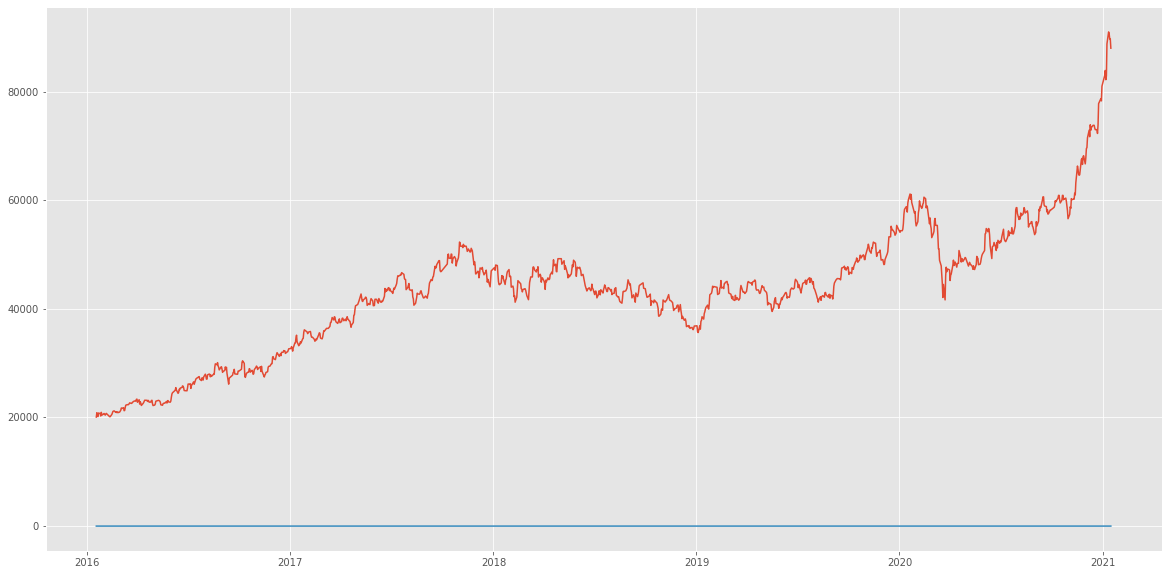

In [53]:
fig = plt.figure(figsize=(20, 10))
plt.plot(df[['Close', 'log_ret']])
# df['log_ret'] = np.log(df['p'].astype('float64')/df['p'].astype('float64').shift(1))



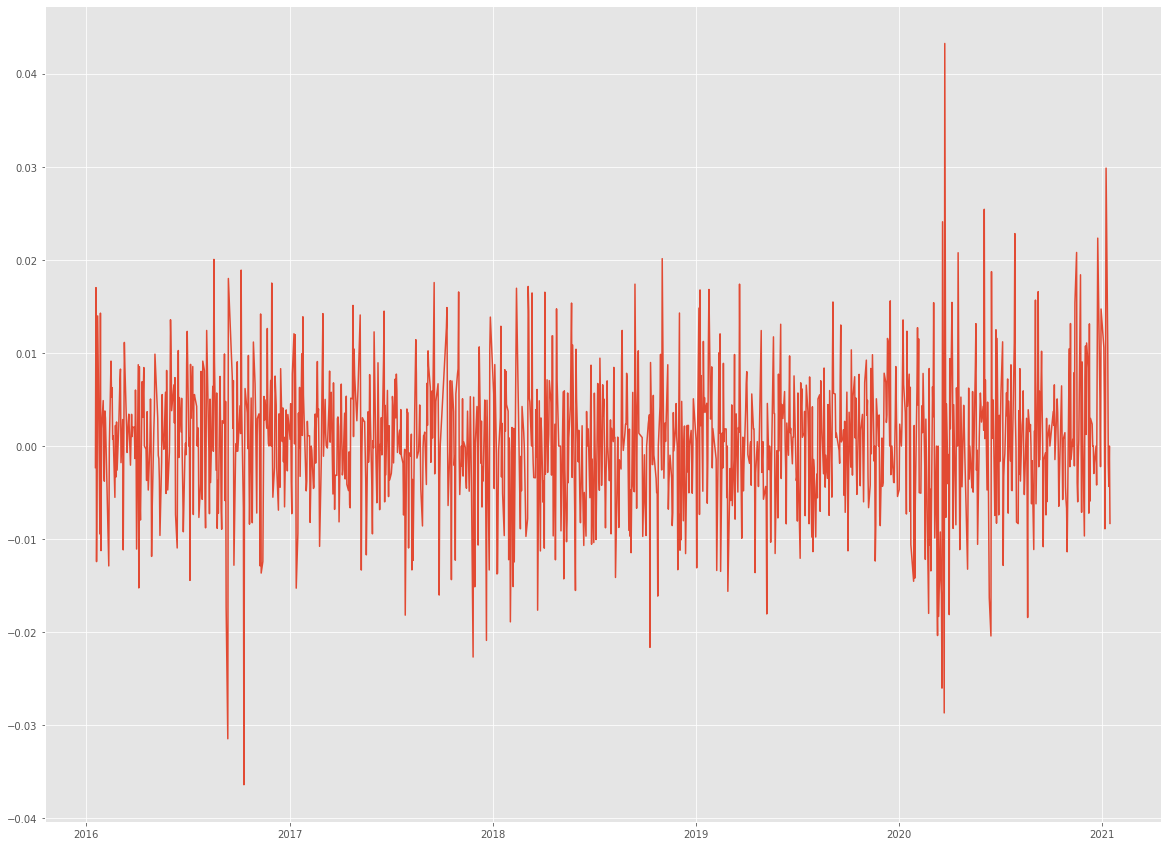

In [57]:
fig2 = plt.figure(figsize=(20,15))
plt.plot(df['log_ret'])

In [58]:
df.describe().round(0).style.format('{:,}')

,High,Low,Open,Close,Volume,Adj_Ratio,pct_change,log_ret
count,"1,220.0","1,220.0","1,220.0","1,220.0","1,220.0","1,220.0","1,220.0","1,220.0"
mean,"43,608.0","42,712.0","43,143.0","43,168.0","14,056,016.0",1.0,0.0,0.0
std,"11,768.0","11,443.0","11,578.0","11,601.0","8,196,345.0",0.0,0.0,0.0
min,"20,199.0","19,397.0","19,397.0","20,074.0",0.0,1.0,-0.0,-0.0
25%,"37,850.0","37,189.0","37,530.0","37,480.0","8,983,112.0",1.0,-0.0,-0.0
50%,"43,992.0","43,192.0","43,603.0","43,644.0","11,823,352.0",1.0,0.0,0.0
75%,"49,248.0","48,276.0","48,881.0","48,872.0","16,368,930.0",1.0,0.0,0.0
max,"96,800.0","89,500.0","90,300.0","91,000.0","90,306,177.0",1.0,0.0,0.0


In [59]:
df

,High,Low,Open,Close,Volume,Adj_Ratio,pct_change,log_ret
Date,,,,,,,,
2016-01-18,20199.130022,19396.869782,19396.869782,20074.333984,16010700.0,0.8914,-0.005300,-0.002308
2016-01-19,20876.591797,20109.987657,20109.987657,20876.591797,10362100.0,0.8914,0.039964,0.017019
2016-01-20,20680.485638,20181.301502,20680.485638,20288.269531,8352600.0,0.8914,-0.028181,-0.012415
2016-01-21,20591.344755,20056.504632,20199.128664,20163.472656,9517600.0,0.8914,-0.006151,-0.002680
2016-01-22,20823.107422,20413.063354,20413.063354,20823.107422,7376400.0,0.8914,0.032714,0.013980
...,...,...,...,...,...,...,...,...
2021-01-11,96800.000000,89500.000000,90000.000000,91000.000000,90306177.0,1.0000,0.024775,0.010628
2021-01-12,91400.000000,87800.000000,90300.000000,90600.000000,48682416.0,1.0000,-0.004396,-0.001913
2021-01-13,91200.000000,89100.000000,89800.000000,89700.000000,36068848.0,1.0000,-0.009934,-0.004336


In [48]:
#삼성전자 수익률 계산 
returns = closePrice_df.pct_change() 
print(returns)

Date
2010-01-04         NaN
2010-01-05    0.016069
2010-01-06    0.023114
2010-01-07   -0.033294
2010-01-08    0.009840
                ...   
2021-01-11    0.024775
2021-01-12   -0.004396
2021-01-13   -0.009934
2021-01-14    0.000000
2021-01-15   -0.018952
Name: Close, Length: 2718, dtype: float64


In [49]:
# 마지막 장마감 금액 
last_price = closePrice_df[-1]
print(last_price)

#시뮬레이션 횟수 
num_simmulations = 1000 
num_days = 250


88000.0


In [50]:
# print((start-end).days)
simmulations_df = pd.DataFrame()

for x in range(num_simmulations):
    count = 0 
    daily_vol = returns.std()
    price_series = []

    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)

    for y in range(num_days):
        if count == 249:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1

    simmulations_df[x] = price_series

simmulations_df.describe().round(0).style.format('{:,}')

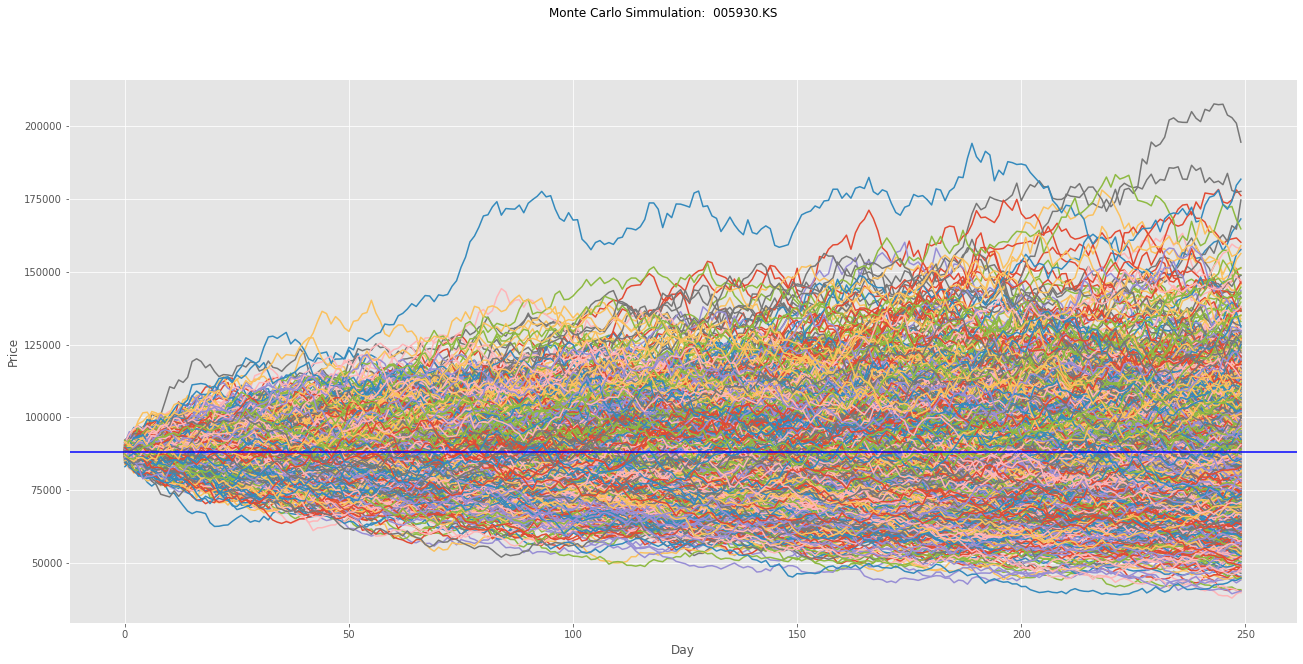

In [39]:
fig = plt.figure(figsize=(22,10))
fig.suptitle('Monte Carlo Simmulation: '+ " " + code )
plt.plot(simmulations_df)
plt.axhline(y = last_price, color='b', linestyle='-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()